<a href="https://colab.research.google.com/github/DonRoboto/RedesNeuronales/blob/master/RedNeuonalBackProp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Red Neuoronal Densa entrenada con Backpropagation

In [0]:
import numpy as np

Esta red neuronal densa está compuesta por una capa de 2 entradas ($x_1$ y $x_2$), una capa oculta con 3 neuronas con función de activación sigmoide y una capa de salida con una sola neurona con función de activación sigmoide. Esta función de activación se define como:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

In [0]:
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

La función sigmoide tiene una derivada que está expresada en términos de la misma función, esto es, 

$$
\frac{\partial \sigma (z)}{\partial z} = \sigma(z) (1 - \sigma(z))
$$

In [0]:
def derivada_sigmoide(x):
    return np.multiply(sigmoide(x), (1.0 - sigmoide(x)))

Podemos ver la operación XOR como una tarea de clasificación binaria a partir de 2 entradas. Por lo tanto, usaremos la función de pérdida de entropía cruzada binaria:

$$
ECB(\mathbf{y}, \mathbf{\hat{y}})  = -\sum_{i=1}^N \left[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log (1 - \hat{y}^{(i)}) \right]
$$

In [0]:
def entropia_cruzada_binaria(y, p):
    p[p == 0] = np.nextafter(0., 1.)
    p[p == 1] = np.nextafter(1., 0.)
    return -(np.log(p[y == 1]).sum() + np.log(1 - p[y == 0]).sum())

Calcularemos la exactitud para medir el rendimiento del modelo aprendido por la red neuronal densa:

$$
exactitud = \frac{correctos}{total}
$$

In [0]:
def exactitud(y, y_predicha):
    return (y == y_predicha).mean() * 100

Definimos la función que propaga hacia adelante una entrada $\mathbf{x}^{i}$. Como la red está compuesta de 2 capas densas (1 oculta y 1 de salida), tenemos 2 matrices de pesos con sus correspondientes vectores de sesgos $\{\mathbf{W}^{\{1\}}, \mathbf{b}^{\{1\}}\}$ y $\{\mathbf{W}^{\{2\}}, \mathbf{b}^{\{2\}}\}$ de la capa oculta y la capa de salida respectivamente. Así, podemos llevar a cabo la propagación hacia adelante en esta red de la siguiente manera:

$$
	\begin{split}
				\mathbf{a}^{\{1\}} & =  \mathbf{x}^{(i)} \\
				\mathbf{z}^{\{2\}} & =  \mathbf{W}^{\{1\}} \cdot \mathbf{a}^{\{1\}} + \mathbf{b}^{\{1\}}\\
				\mathbf{a}^{\{2\}} & =  \sigma(\mathbf{z}^{\{2\}}) \\
				\mathbf{z}^{\{3\}} & =  \mathbf{W}^{\{2\}} \cdot \mathbf{a}^{\{2\}}  + \mathbf{b}^{\{2\}}\\
				\mathbf{a}^{\{3\}} & =  \sigma(\mathbf{z}^{\{3\}})\\
				\hat{y}^{(i)} & =  \mathbf{a}^{\{3\}}
			\end{split}
      $$

In [0]:
def hacia_adelante(x, W1, b1, W2, b2, W3, b3, W4, b4):
  z2 = np.dot(W1.T, x[:, np.newaxis]) + b1
  a2 = sigmoide(z2)  
  z3 = np.dot(W2.T, a2) + b2
  a3 = sigmoide(z3)
  z4 = np.dot(W3.T, a3) + b3
  a4 = sigmoide(z4)
  z5 = np.dot(W4.T, a4) + b4
    
  y_hat = sigmoide(z5)
  
  return z2, a2, z3, a3, z4, a4, z5, y_hat

Definimos la función para entrenar nuestra red neuronal usando gradiente descendente. Para calcular el gradiente de la función de pérdida respecto a los pesos y sesgos en cada capa empleamos el algoritmo de retropropagación de errores.


In [0]:
def retropropagacion(X, y, alpha = 0.01, n_epocas = 100, n_ocultas = 10):
    n_ejemplos = X.shape[0]
    n_entradas = X.shape[1]
    
    # Inicialización de las matrices de pesos W y V
    W1 = np.sqrt(1.0 / n_entradas) * np.random.randn(n_entradas, n_ocultas)
    b1 = np.zeros((n_ocultas, 1))
    
    W2 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, n_ocultas)
    b2 = np.zeros((1, 1))
    
    W3 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, n_ocultas)
    b3 = np.zeros((1, 1))

    W4 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, 1)
    b4 = np.zeros((1, 1))
    
    perdidas = np.zeros((n_epocas))
    exactitudes = np.zeros((n_epocas))
    y_predicha = np.zeros((y.shape))
    for i in range(n_epocas):
        for j in range(n_ejemplos):
            z2, a2, z3, a3, z4, a4, z5, y_hat = hacia_adelante(X[j], W1, b1, W2, b2, W3, b3, W4, b4)

            # cálculo de gradiente para W3 por retropropagación
            delta5 = (y_hat - y[j]) * derivada_sigmoide(z5)
            W4 = W4 - alpha * np.outer(a4, delta5)
            b4 = b4 - alpha * delta5

            # cálculo de gradiente para W3 por retropropagación
            delta4 = (y_hat - y[j]) * derivada_sigmoide(z4)
            W3 = W3 - alpha * np.outer(a3, delta4)
            b3 = b3 - alpha * delta4
            
            # cálculo de gradiente para W2 por retropropagación
            delta3 = (y_hat - y[j]) * derivada_sigmoide(z3)
            W2 = W2 - alpha * np.outer(a2, delta3)
            b2 = b2 - alpha * delta3

            # cálculo de gradiente para W1 por retropropagación
            delta2 = np.dot(W2, delta3) * derivada_sigmoide(z2)
            W1 = W1 - alpha * np.outer(X[j], delta2)
            b1 = b1 - alpha * delta2

            y_predicha[j] = y_hat
            
        # calcula error en época
        perdidas[i] = entropia_cruzada_binaria(y, y_predicha)
        exactitudes[i] = exactitud(y, np.round(y_predicha))
        if i%10==0:
          print('Epoch {0}: Error = {1} Exactitud = {2}'.format(i, 
                                                              perdidas[i], 
                                                              exactitudes[i]))

    return W1, W2, W3, W4, b1, b2, b3, b4, perdidas, exactitudes

# ejemplo (XNOR)

In [0]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0, 0, 1]]).T

Finalmente, entrenamos nuestra red con estos ejemplos por 200 épocas usando una tasa de aprendizaje $\alpha = 1.0$.

In [20]:
np.random.seed(0)
W1t, W2t, W3t, W4t, b1t, b2t, b3t, b4t, perdidas, exactitudes = retropropagacion(X, 
                                                 y, 
                                                 alpha = 1.0, 
                                                 n_epocas = 1000,
                                                 n_ocultas = 10)

Epoch 0: Error = 3.2875035895537 Exactitud = 50.0
Epoch 10: Error = 4.434426346777828 Exactitud = 50.0
Epoch 20: Error = 4.488684454264117 Exactitud = 50.0
Epoch 30: Error = 4.506652238938841 Exactitud = 50.0
Epoch 40: Error = 4.515809657298049 Exactitud = 50.0
Epoch 50: Error = 4.520692804648317 Exactitud = 50.0
Epoch 60: Error = 4.521813116853505 Exactitud = 50.0
Epoch 70: Error = 4.515807370689476 Exactitud = 50.0
Epoch 80: Error = 4.470088591170661 Exactitud = 50.0
Epoch 90: Error = 4.0942306258209324 Exactitud = 25.0
Epoch 100: Error = 3.396474975982227 Exactitud = 25.0
Epoch 110: Error = 2.960848350766512 Exactitud = 75.0
Epoch 120: Error = 2.8297571494580733 Exactitud = 75.0
Epoch 130: Error = 2.7822231744940575 Exactitud = 75.0
Epoch 140: Error = 2.763050432656656 Exactitud = 75.0
Epoch 150: Error = 2.754944990361451 Exactitud = 75.0
Epoch 160: Error = 2.7516815284954808 Exactitud = 75.0
Epoch 170: Error = 2.7507539940515287 Exactitud = 75.0
Epoch 180: Error = 2.750999858872723

Graficamos el valor de la pérdida y la exactitud en cada época para ver el comportamiento de nuestra red durante el entrenamiento:

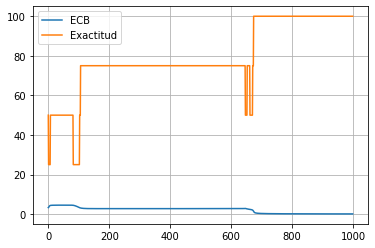

In [21]:
import matplotlib.pyplot as plt
plt.plot(np.arange(perdidas.size), perdidas, label='ECB')
plt.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
plt.legend()
plt.grid(True)
plt.show()

Probamos nuestro modelo

In [22]:
for i in range(4):
  z2, a2, z3, a3, z4, a4, z5, y_hat = hacia_adelante(X[i], W1t, b1t, W2t, b2t, W3t, b3t, W4t, b4t)
  
  if y_hat<0.5:
    y_hat_label = 0
  else:
    y_hat_label = 1  
  
  print(y[i],y_hat_label)

[1] 1
[0] 0
[0] 0
[1] 1
